# Matrix factorizations and computing eigenvalues

Recall that an $n\times n$ matrix $A$ is *symmetric* if $A^T=A$ and *hermitian* if $A^H=A$, where $A^H$ is the conjugate transpose of a complex matrix. In either case, the corresponding matrix transformation $T_A$ is said to be *self-adjoint*, which means that it satisfies the condition

$$\langle u,T_Av\rangle = \langle T_Au,v\rangle$$

for all $u,v\in \mathbb{R}^n$ (or $\mathbb{C}^n$). 

All such matrices (or operators) can be *diagonalized*, in the sense that there is an orthonormal basis of eigenvectors for that matrix. These eigenvectors can be arranged to form an orthogonal matrix $P$ (or unitary matrix $U$) such that

$$P^TAP = D \quad \text{ (or } U^HAU=D),$$

where $D$ is a diagonal matrix whose entries are the eigenvalues of $A$.

## Positive operators

A symmetric/hermitian matrix $A$ (or operator $T$) is *positive* if $x^TAx\geq 0$ ($\langle x,Tx\rangle\geq 0$) for all vectors $x$.

(For positive-*definite* we require this to be strictly greater than 0.)

This is equivalent to requiring that all the eigenvalues of $A$ are non-negative. Every positive matrix $A$ has a unique positive *square root*: a matrix $R$ such that $R^2=A$.

## Singular values

For any $n\times n$ matrix $A$, the matrices $A^TA$ and $AA^T$ are both positive. (Exercise!)

This means that we can define $\sqrt{A^TA}$, even if $A$ itself is not symmetric or positive.

- Since $A^TA$ is symmetric, we know that it can be diagonalized.

- Since $A^TA$ is positive, we know its eigenvalues are non-negative.

- This means we can define the *singular values* $\sigma_i = \sqrt{\lambda_i}$ for each $i=1,\ldots, n$.

- **Note**: it's possible to do this even if $A$ is not a square matrix!

## Singular value decomposition

For an $n\times n$ matrix $A$, we might not be able to diagonalize $A$ (with a single orthonormal basis) it's possible to find a *pair* of orthonormal bases $\{e_1,\ldots, e_n\}, \{f_1,\ldots, f_n\}$ such that 

$$Ax = \sigma_1(x\cdot e_1)f_1+\cdots + \sigma_n(x\cdot e_n)f_n.$$

In matrix form, $A = P\Sigma_A Q^T$ for orthogonal matrices $P,Q$.

## Polar decomposition

For any $n\times n$ matrix $A$, there exists an orthogonal (or unitary) matrix $P$ such that

$$A = P\sqrt{A^TA}.$$

This is meant to remind you of the polar decomposition $$z = e^{i\theta}\sqrt{\bar{z}z}$$ for a complex number.

One way to compute the polar decomposition is using the Singular Value Decomposition (see Nicholson's text).

**Note:** both $P$ and $\sqrt{A^TA}$ can be diagonalized, but usually not with the same orthonormal basis.

## QR factorization

Suppose $A$ is an $m\times n$ matrix with independent columns.

(Question: for this to happen, which is true -- $m\geq n$, or $n\geq m$?)

A $QR$-*factorization* of $A$ is a factorization of the form $A=QR$, where $Q$ is $m\times n$, with orthonormal columns, and $R$ is an invertible upper-triangular ($n\times n$) matrix with positive diagonal entries.

If $A$ is a square matrix, $Q$ will be orthogonal.

### Computing a QR factorization

A lot of the methods we're looking at here involve more sophisticated numerical techniques than SymPy is designed to handle. If we wanted to spend time on these topics, we'd have to learn a bit about the *NumPy* package, which has built in tools for finding things like polar decomposition and singular value decomposition.

However, SymPy *does* know how to do $QR$ factorization. After defining a matrix `A`, we can use the command
```
Q, R = A.QRdecomposition()
```

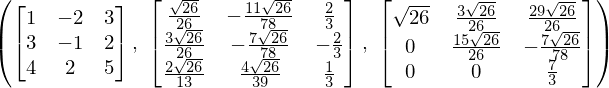

In [1]:
from sympy import *
init_printing()
A = Matrix(3,3,[1,-2,3,3,-1,2,4,2,5])  
Q, R = A.QRdecomposition()
A, Q, R

In [23]:
Q**-1 == Q.T

True

Details of how to perform the QR factorization can be found in Nicholson's textbook. It's essentially a consequence of performing the Gram-Schmidt algorithm on the columns of $A$, and keeping track of our work.

The calculation above is a symbolic computation, which is nice for understanding what's going on.
The reason why the $QR$ factorization is useful in practice is that there are efficient numerical methods for doing it (with good control over rounding errors).

Our next topic looks at a useful application of the $QR$ factorization.

## Computing eigenvalues

Our first method focuses on the *dominant eigenvalue* of a matrix. An eigenvalue is **dominant** if it is larger in absolute value than all other eigenvalues.

For example, if $A$ has eigenvalues $1,3,-2,-5$, then $-5$ is the dominant eigenvalue.

If $A$ has eigenvalues $1,3,0,-4,4$ then there is no dominant eigenvalue.

Any eigenvector corresponding to a dominant eigenvalue is called a *dominant eigenvector*.

## Power method

If a matrix $A$ has a dominant eigenvalue, there is a method for finding it (approximately) that does not involve finding and factoring the characteristic polynomial of $A$.

We start with some initial guess $x_0$ for a dominant eigenvector. We then set $x_{k+1} = Ax_k$ for each $k\geq 0$, giving a sequence

$$x_0, Ax_0, A^2x_0, A^3x_0,\ldots$$

We expect (for reasons we'll explain) that $\lVert x_k-x\rVert \to 0$ as $k\to\infty$, where $x$ is a dominant eigenvector. Let's try an example.

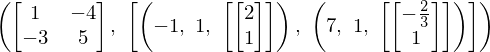

In [4]:
A = Matrix(2,2,[1,-4,-3,5])
A,A.eigenvects()

The dominant eigenvalue is $\lambda = 7$. Let's try an initial guess of $x_0=\begin{bmatrix}1\\0\end{bmatrix}$ and see what happens.

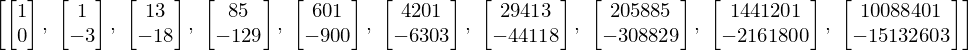

In [5]:
x0 = Matrix([1,0])
L = list()
for k in range(10):
    L.append(A**k*x0)
L

In [8]:
10088401/15132603

For the eigenvalue, we note that if $Ax=\lambda x$, then

$$\frac{x\cdot Ax}{\lVert x\rVert^2} = \frac{x\cdot (\lambda x)}{\lVert x\rVert^2} = \lambda.$$

This leads us to consider the *Rayleigh quotients*

$$r_k = \frac{x_k\cdot x_{k+1}}{\lVert x_k\rVert^2}.$$

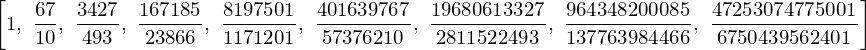

In [9]:
M = list()
for k in range(9):
    M.append((L[k].dot(L[k+1]))/(L[k].dot(L[k])))
M

We can convert a rational number `r` to a float using either `N(r)` or `r.evalf()`. (The latter seems to be the better bet when working with a list.)

In [10]:
M2 = list()
for k in range(9):
    M2.append((M[k]).evalf())
M2

## The QR Algorithm

Given an $n\times n$ matrix $A$, we know we can write $A=QR$, with $Q$ orthgonal and $R$ upper-triangular.
The $QR$-algorithm exploits this fact. We set $A_1=A$, and write $A_1=Q_1R_1$.

Then we set $A_2 = R_1Q_1$, and factor: $A_2=Q_2R_2$. Notice $A_2 = R_1Q_1 = Q_1^TA_1Q_1$. Since $A_2$ is similar to $A_1$, $A_2$ has the same eigenvalues as $A_1=A$.

Next, set $A_3 = R_2Q_2$, and factor as $A_3 = Q_3R_3$. Since $A_3 = Q_2^TA_2Q_2$, $A_3$ has the same eigenvalues as $A_2$. In fact, $A_3 = Q_2^T(Q_1^TAQ_1)Q_2 = (Q_1Q_2)^TA(Q_1Q_2)$.

After $k$ steps we have $A_{k+1} = (Q_1\cdots Q_k)^TA(Q_1\cdots Q_k)$, which still has the same eigenvalues as $A$.

By some sort of dark magic, this sequence of matrices converges to an upper triangular matrix with eigenvalues on the diagonal.

Consider the matrix $A = \begin{bmatrix}5&-2&3\\0&4&0\\0&-1&3\end{bmatrix}$

In [11]:
A = Matrix(3,3,[5,-2,3,0,4,0,0,-1,3])
A.eigenvals()

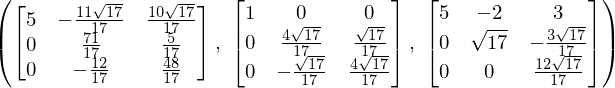

In [13]:
Q1,R1 = A.QRdecomposition()
A2=R1*Q1
A2,Q1,R1

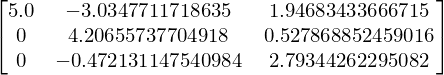

In [16]:
Q2,R2 = A2.QRdecomposition()
A3=R2*Q2
A3.evalf()

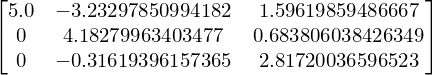

In [17]:
Q3,R3 = A3.QRdecomposition()
A4 = R3*Q3
A4.evalf()

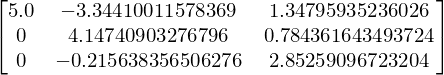

In [18]:
Q4,R4=A4.QRdecomposition()
A5 = R4*Q4
A5.evalf()

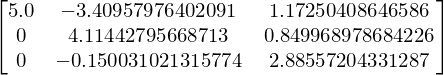

In [19]:
Q5,R5=A5.QRdecomposition()
A6 = R5*Q5
A6.evalf()

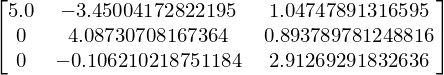

In [21]:
Q6,R6=A6.QRdecomposition()
A7 = R6*Q6
A7.evalf()